In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
%%time
counts = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE93374/GSE93374_Merged_all_020816_DGE.txt', 
                        delimiter='\t',header=0).T
obs = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE93374/GSE93374_cell_metadata.txt', 
                        delimiter='\t',header=0)

CPU times: total: 1min 47s
Wall time: 1min 47s


In [3]:
counts.index.name='1.ID'

In [4]:
obs.set_index('1.ID', inplace=True)

In [5]:
counts.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,Mir210,Mir7662,Olfr1277,Olfr354,RP23-143M9.2,RP24-383P24.2,Reg4,Sult1c2,Tfpi2,Trex2
1.ID,,,,,,,,,,,,,,,,,,,,,
arc1_TACTAACAGTAN,0,1,6,0,0,1,5,0,7,0,...,0,0,0,0,0,0,0,0,0,0
arc1_CCGCGAGCTCTT,0,0,5,0,2,1,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
arc1_GTTGCACGGATA,0,0,3,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
arc1_CTGGCATTTTAT,0,0,2,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
arc1_TGCAACGACTAT,0,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
obs.head()

,2.group,3.batches,4.sex,5.Diet,6.FvF,7.clust_all,8.clust_all_neurons,9.clust_all_micro,10.clust_neurons,11.Sex_pred,Unnamed: 11,All Cell Clusters,All Cell Subclusters,Neuron Subclusters
1.ID,,,,,,,,,,,,,,
arc1_AAAATCTCTCCC,arc1,b1,M,Chow,Fed,a03,a03,s11,miss,M,NaN,a01.Oligodend3,s01.Ependymocy1,n01.Hdc
arc1_AAAGCGGATGCG,arc1,b1,M,Chow,Fed,a03,a03,s11,miss,M,NaN,a02.Oligodend2,s02.Ependymocy2,n02.Gm8773/Tac1
arc1_AACGTGTCTAAC,arc1,b1,M,Chow,Fed,a03,a03,s11,miss,M,NaN,a03.EndothelialCells,s03.Oligodendro1,n04.Sst/Nts
arc1_ACTATACTCTCA,arc1,b1,M,Chow,Fed,a03,a03,s11,miss,M,NaN,a04.MuralCells,s04.Oligodendro2,n05.Nfix/Htr2c
arc1_AGCGGCCGACCA,arc1,b1,M,Chow,Fed,a03,a03,s11,miss,M,NaN,a05.Oligodend1,s05.Oligodendro3,n06.Oxt


In [7]:
index_intersection = counts.index.intersection(obs.index)

In [8]:
counts = counts.loc[index_intersection]  
obs = obs.loc[index_intersection]

In [9]:
counts

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610025J13Rik,...,Mir210,Mir7662,Olfr1277,Olfr354,RP23-143M9.2,RP24-383P24.2,Reg4,Sult1c2,Tfpi2,Trex2
1.ID,,,,,,,,,,,,,,,,,,,,,
arc1_TACTAACAGTAN,0,1,6,0,0,1,5,0,7,0,...,0,0,0,0,0,0,0,0,0,0
arc1_CCGCGAGCTCTT,0,0,5,0,2,1,1,1,5,0,...,0,0,0,0,0,0,0,0,0,0
arc1_GTTGCACGGATA,0,0,3,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
arc1_CTGGCATTTTAT,0,0,2,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
arc1_TGCAACGACTAT,0,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaleFed_AAGCAGCGCAAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MaleFed_CGACAATGTCGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MaleFed_GCGTTCAGCCTN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
obs

,2.group,3.batches,4.sex,5.Diet,6.FvF,7.clust_all,8.clust_all_neurons,9.clust_all_micro,10.clust_neurons,11.Sex_pred,Unnamed: 11,All Cell Clusters,All Cell Subclusters,Neuron Subclusters
1.ID,,,,,,,,,,,,,,
arc1_TACTAACAGTAN,arc1,b1,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN
arc1_CCGCGAGCTCTT,arc1,b1,M,Chow,Fed,a19,a19,s10,miss,M,NaN,NaN,NaN,NaN
arc1_GTTGCACGGATA,arc1,b1,M,Chow,Fed,a13,neuron,s21,n06,M,NaN,NaN,NaN,NaN
arc1_CTGGCATTTTAT,arc1,b1,M,Chow,Fed,a18,neuron,s26,n13,M,NaN,NaN,NaN,NaN
arc1_TGCAACGACTAT,arc1,b1,M,Chow,Fed,a18,neuron,s26,n13,M,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaleFed_AAGCAGCGCAAC,MFed,b6,M,Chow,Fed,a06,a06,s29,miss,M,NaN,NaN,NaN,NaN
MaleFed_CGACAATGTCGN,MFed,b6,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN
MaleFed_GCGTTCAGCCTN,MFed,b6,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN


In [11]:
obs['2.group'].value_counts()

HFD      3397
Ch10     3107
UFast    2658
Refed    2619
arc1     2607
arc2     2463
arc3     2288
FFed      681
MFast     560
MFed      359
FFast     347
Name: 2.group, dtype: int64

In [19]:
adata = sc.AnnData(X=counts, obs=obs)

C:\Users\23247\AppData\Local\Temp\ipykernel_10992\1923552843.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts, obs=obs)


In [20]:
adata.X = sparse.csr_matrix(adata.X)

In [21]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [22]:
adata = adata[adata.obs.total_counts < 75000, :]

In [23]:
adata

View of AnnData object with n_obs × n_vars = 21086 × 26774
    obs: '2.group', '3.batches', '4.sex', '5.Diet', '6.FvF', '7.clust_all', '8.clust_all_neurons', '9.clust_all_micro', '10.clust_neurons', '11.Sex_pred', 'Unnamed: 11', 'All Cell Clusters', 'All Cell Subclusters', 'Neuron Subclusters', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [25]:
adata

AnnData object with n_obs × n_vars = 21086 × 22802
    obs: '2.group', '3.batches', '4.sex', '5.Diet', '6.FvF', '7.clust_all', '8.clust_all_neurons', '9.clust_all_micro', '10.clust_neurons', '11.Sex_pred', 'Unnamed: 11', 'All Cell Clusters', 'All Cell Subclusters', 'Neuron Subclusters', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

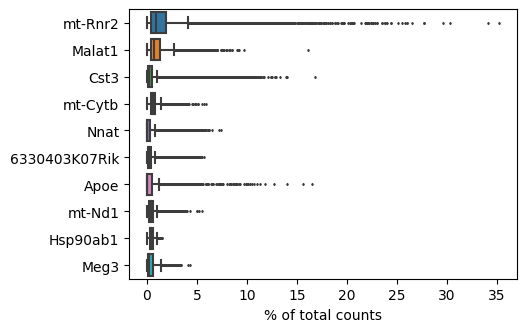

In [26]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [27]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [28]:
adata.obs

,2.group,3.batches,4.sex,5.Diet,6.FvF,7.clust_all,8.clust_all_neurons,9.clust_all_micro,10.clust_neurons,11.Sex_pred,Unnamed: 11,All Cell Clusters,All Cell Subclusters,Neuron Subclusters,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
1.ID,,,,,,,,,,,,,,,,,,,
arc1_TACTAACAGTAN,arc1,b1,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN,7868,50333.0,7876,0.0,0.0
arc1_CCGCGAGCTCTT,arc1,b1,M,Chow,Fed,a19,a19,s10,miss,M,NaN,NaN,NaN,NaN,6424,27353.0,6427,0.0,0.0
arc1_GTTGCACGGATA,arc1,b1,M,Chow,Fed,a13,neuron,s21,n06,M,NaN,NaN,NaN,NaN,5680,26331.0,5684,0.0,0.0
arc1_CTGGCATTTTAT,arc1,b1,M,Chow,Fed,a18,neuron,s26,n13,M,NaN,NaN,NaN,NaN,5235,22308.0,5237,0.0,0.0
arc1_TGCAACGACTAT,arc1,b1,M,Chow,Fed,a18,neuron,s26,n13,M,NaN,NaN,NaN,NaN,5247,20896.0,5253,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MaleFed_AAGCAGCGCAAC,MFed,b6,M,Chow,Fed,a06,a06,s29,miss,M,NaN,NaN,NaN,NaN,842,1032.0,844,0.0,0.0
MaleFed_CGACAATGTCGN,MFed,b6,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN,831,1033.0,831,0.0,0.0
MaleFed_GCGTTCAGCCTN,MFed,b6,M,Chow,Fed,a18,neuron,s26,n34,M,NaN,NaN,NaN,NaN,813,1018.0,813,0.0,0.0


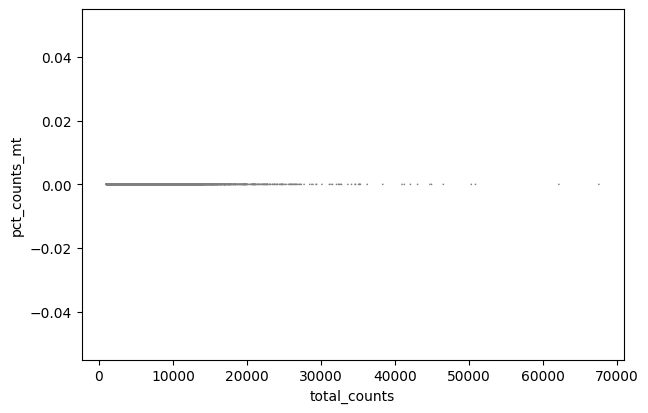

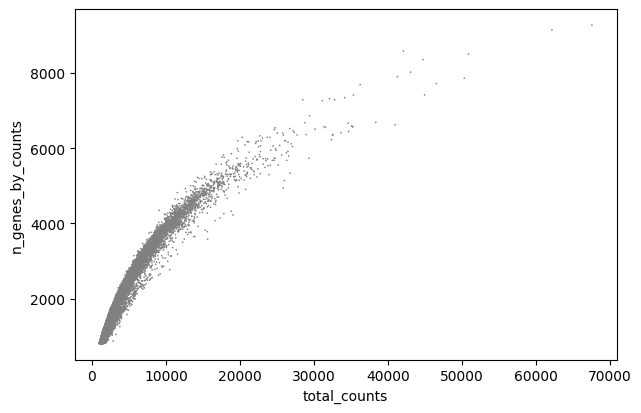

In [29]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [30]:
adata.raw = adata

In [31]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Campbell/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Campbell/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Campbell/processed/Campbell.h5ad')

In [35]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var 

In [36]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Campbell/processed/campbell_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Campbell/processed/campbell_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Campbell/processed/campbell_expression_matrix.mtx', expression_matrix)

## Top2000

In [32]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

In [33]:
adata_top = adata[:, adata.var.highly_variable]

In [34]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed/Campbell_top2000.h5ad')

In [37]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [38]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed/campbell_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed/campbell_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Campbell_top2000/processed/campbell_expression_matrix_top2000.mtx', expression_matrix_top)